## Classify Cats Dogs Panda using Pretrained Weights

**Objective:**

* Load the pre-trained weights for CatsDogsPanda dataset trained with simple CNN.
* Test few images with the pretrained weights.

## Load weights

In [36]:
import numpy as np
import cv2
import pathlib
import matplotlib.pyplot as plt

In [2]:
from keras.models import load_model

In [5]:
print('Numpy: ', np.__version__)
print('Opencv: ', cv2.__version__)

Numpy:  1.14.2
Opencv:  3.4.4


In [6]:
import os
os.listdir('.')

['.ipynb_checkpoints',
 'CatsDogsPanda_ImageClassifer.ipynb',
 'CatsDogsPanda_ImageClassifier_CNN.ipynb',
 'CatsDogsPanda_simple_cnn_weights.hdf5',
 'CatsDogsPanda_Use_Pretrained_CNN_Weights.ipynb',
 'DigitClassifier_MNIST.ipynb',
 'ImageClassifier.ipynb',
 'mnist_accuracy.png',
 'Test.py']

In [7]:
# load the model from weights.file
model = load_model('./CatsDogsPanda_simple_cnn_weights.hdf5')

## Sample Test images

In [18]:
ImageDir = '../datasets/animals'

# recursively go over the datset folder and get the file names.
ImageList = np.array(list(pathlib.Path(ImageDir).rglob('*.jpg')))
print(len(ImageList))

3000


In [19]:
?np.random.randint

In [20]:
idxs = np.random.randint(1, len(ImageList), size=10)

In [21]:
idxs

array([1279, 2942, 2606,  236,  484,  229, 2710, 2534,  931, 1504])

In [22]:
TestImageList = ImageList[idxs]

In [23]:
TestImageList

array([PosixPath('../datasets/animals/dogs/dogs_00280.jpg'),
       PosixPath('../datasets/animals/panda/panda_00943.jpg'),
       PosixPath('../datasets/animals/panda/panda_00607.jpg'),
       PosixPath('../datasets/animals/cats/cats_00237.jpg'),
       PosixPath('../datasets/animals/cats/cats_00485.jpg'),
       PosixPath('../datasets/animals/cats/cats_00230.jpg'),
       PosixPath('../datasets/animals/panda/panda_00711.jpg'),
       PosixPath('../datasets/animals/panda/panda_00535.jpg'),
       PosixPath('../datasets/animals/cats/cats_00932.jpg'),
       PosixPath('../datasets/animals/dogs/dogs_00505.jpg')], dtype=object)

## Load the images

 * Note that, we have preprocessed the images.  Follow the same thing for the test images as well.

In [26]:
## load all the images
## resize them to one size
def preprocess_image(img, width, height, interpolation=cv2.INTER_AREA):
    return( cv2.resize(img, (width, height), interpolation))

In [27]:
# load all images.
def load_all_images(imageList, verbose=-1):
    data = []
    labels = []

    # go over each image - read them and extract class label from the path
    for (i, imagepath) in enumerate(imageList):
        filename = imagepath.as_posix()
        img = cv2.imread(filename)
        label = filename.split(os.path.sep)[-2]
        img = preprocess_image(img, 32, 32)

        data.append(img)
        labels.append(label)

        if ( verbose > 0 and i > 0 and (i+1) % verbose == 0):
            print('Info: Processed {} / {}'.format(i+1, len(imageList)))


    return(np.array(data), np.array(labels))

In [30]:
##
print('Load All Test Images...')
(data, labels) = load_all_images(TestImageList, verbose=2)

Load All Test Images...
Info: Processed 2 / 10
Info: Processed 4 / 10
Info: Processed 6 / 10
Info: Processed 8 / 10
Info: Processed 10 / 10


In [31]:
# normalize the data
data = data.astype("float") / 255.0

In [32]:
class_labels = ['cat', 'dog', 'panda']

## Do the Prediction

In [33]:
# predicts returns the probabilities.
pred = model.predict(data, batch_size=32).argmax(axis=1)

In [34]:
pred

array([1, 1, 2, 0, 0, 0, 2, 2, 0, 1])

## Display results

* Note that, our classifier has accuracy of 66%. **So, you can expect some of predictions are not correct**.

In [35]:
?cv2.putText

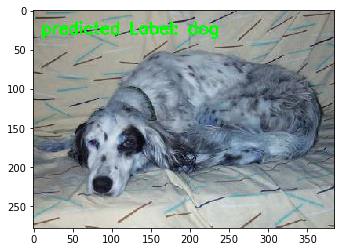

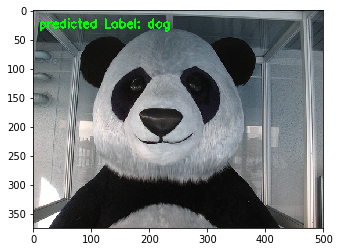

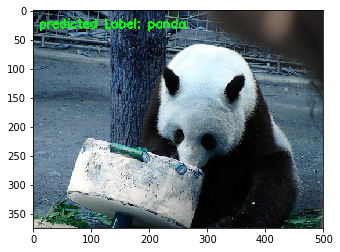

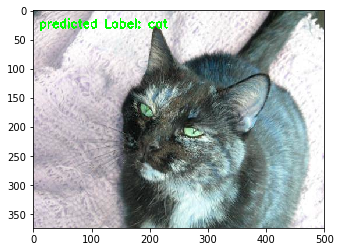

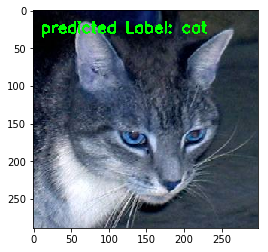

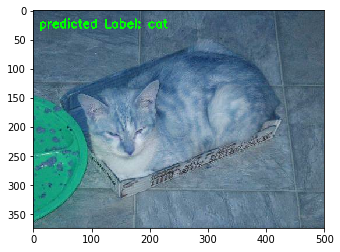

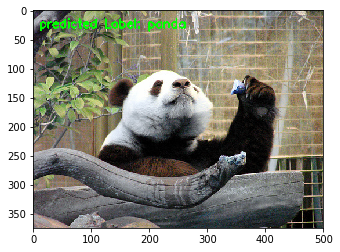

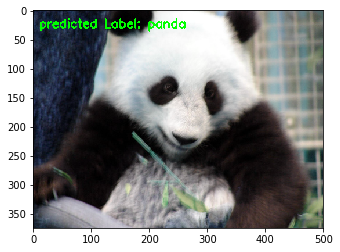

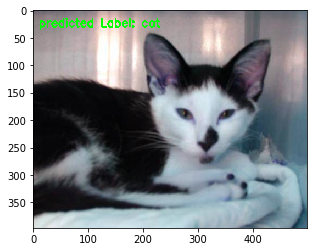

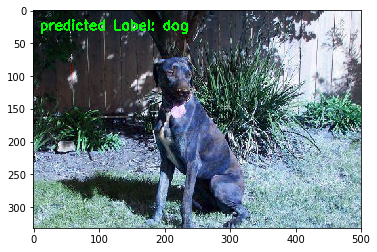

In [41]:
for (i, file_name) in enumerate(TestImageList):
    image_name = file_name.as_posix()
    #print(image_name)
    img = cv2.imread(image_name)
    origin = (10,30)  ##pixel position to show 
    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.7
    color = (0, 255, 0)
    thickness = 2
    cv2.putText(img, "predicted Label: {}".format(class_labels[pred[i]]), origin, fontFace, fontScale, color, thickness)
    plt.imshow(img)
    plt.show()